# Comcast stock analysis with OHLC chart (open, high, low, close)

In [3]:
from matplotlib import pyplot as plt
from matplotlib import style
from matplotlib.finance import candlestick_ohlc
from pandas_datareader import data as pdr
import matplotlib.dates as mdates
import pandas as pd
import fix_yahoo_finance as fyf
fyf.pdr_override()
style.use('ggplot')
%matplotlib inline

In [4]:
# reads in Comcast stock to df
df = pdr.get_data_yahoo('CMCSA',start='2016-01-01')
style.use('ggplot')

[*********************100%***********************]  1 of 1 downloaded


In [5]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-04,27.575001,27.825001,27.424999,27.820000,25.877962,26524600
2016-01-05,27.920000,28.025000,27.740000,27.825001,25.882614,28308800
2016-01-06,27.459999,27.825001,27.375000,27.610001,25.682621,21650800
2016-01-07,27.045000,27.680000,26.885000,27.305000,25.398912,32423400
2016-01-08,27.430000,28.020000,27.285000,27.334999,25.426817,28184600


In [6]:
# resampling with a 10 day window
df_ohlc = df['Adj Close'].resample('10D').ohlc()
df_volume = df['Volume'].resample('10D').sum()

In [7]:
# resets the idnex so the dates is a column 
df_ohlc.reset_index(inplace=True)
df_ohlc['Date'] = df_ohlc['Date'].map(mdates.date2num)

In [8]:
df_ohlc.head()

,Date,open,high,low,close
0,735967.0,25.877962,25.882614,24.905910,24.905910
1,735977.0,25.603554,25.733786,24.933815,25.733786
2,735987.0,25.212872,25.957031,25.166365,25.389610
3,735997.0,26.901169,27.631376,25.957031,26.408169
4,736007.0,26.733742,27.045357,26.659327,27.045357


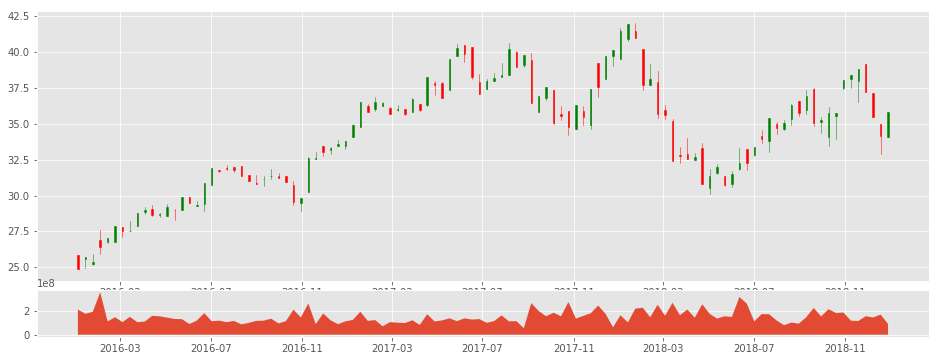

In [9]:
plt.figure(figsize=(16,6))
ax1 = plt.subplot2grid((6,1),(0,0),rowspan=5,colspan=1)
ax2 = plt.subplot2grid((6,1),(5,0),rowspan=1,colspan=1,sharex=ax1)
ax1.xaxis_date()

candlestick_ohlc(ax1, df_ohlc.values, width=2, colorup='g')
ax2.fill_between(df_volume.index.map(mdates.date2num),df_volume.values,0);